In [16]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(CountVectorizer, self).build_analyzer()
        def stem (doc):
            return [stemmer.stem(x) for x in analyzer(doc)]
        return stem

In [37]:
muestra = 400000

cvectorizer = pickle.load(open("./data/cvz-20-400-%s.pickle"%muestra, "rb"))
lda_model = pickle.load(open("./data/ldamodel-20-400-%s-20.pickle"%muestra, "rb"))

0


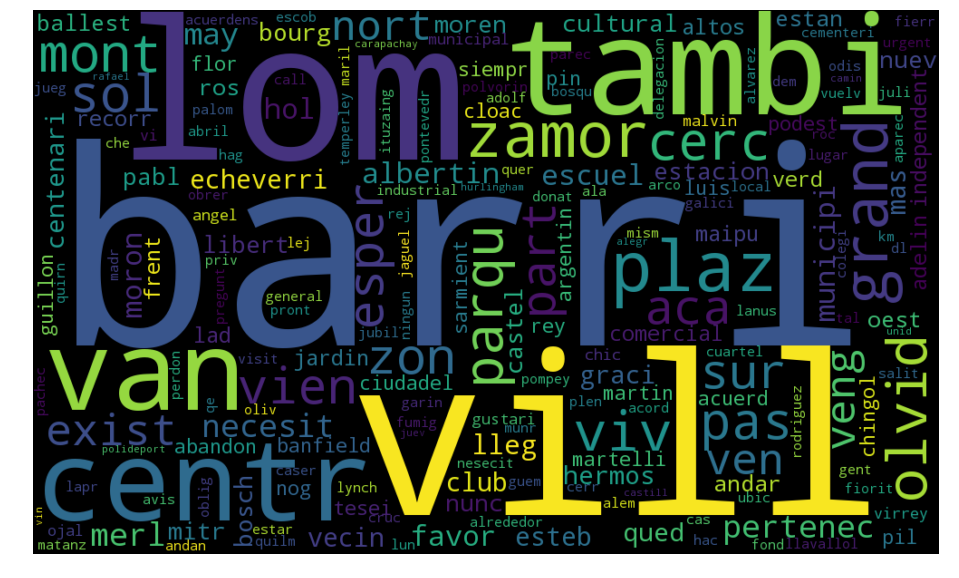

1


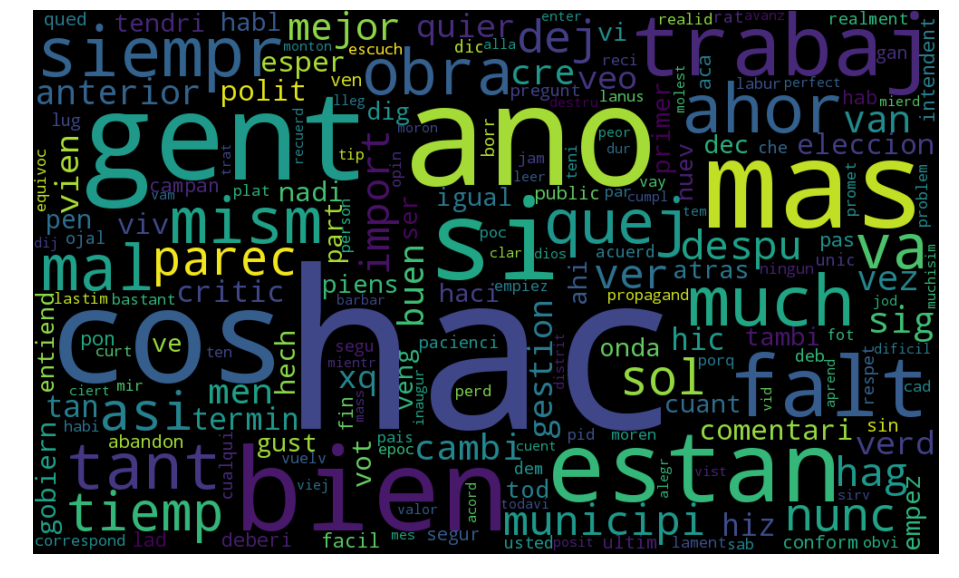

2


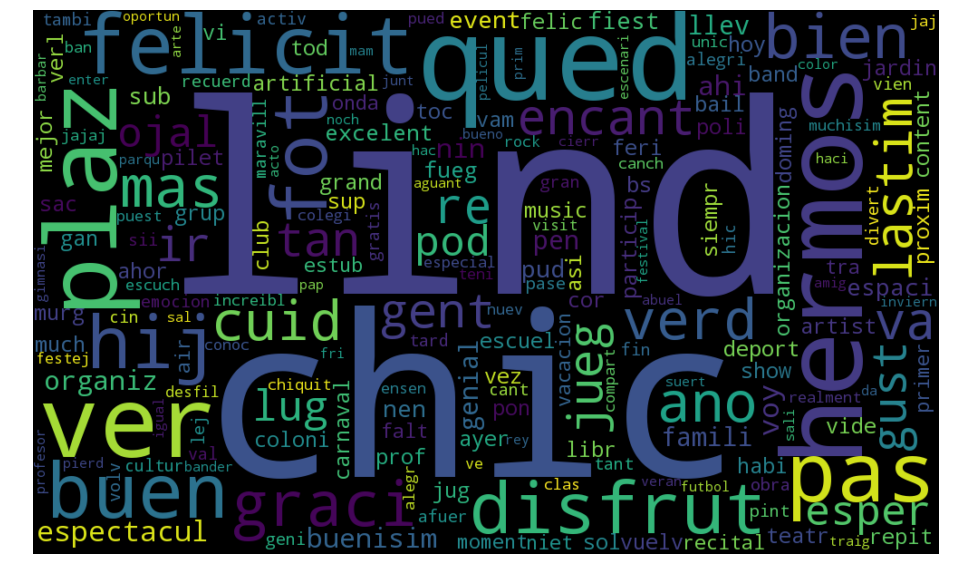

3


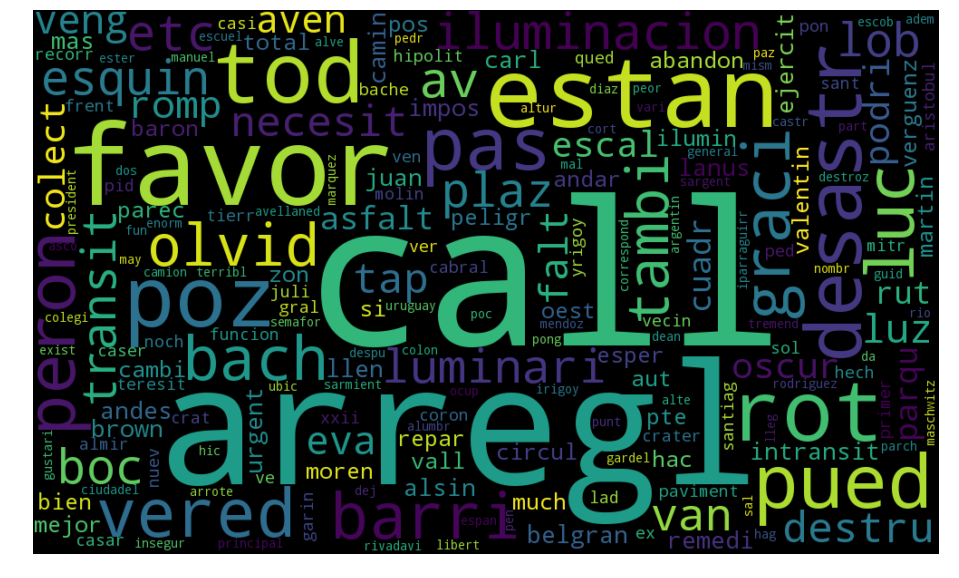

4


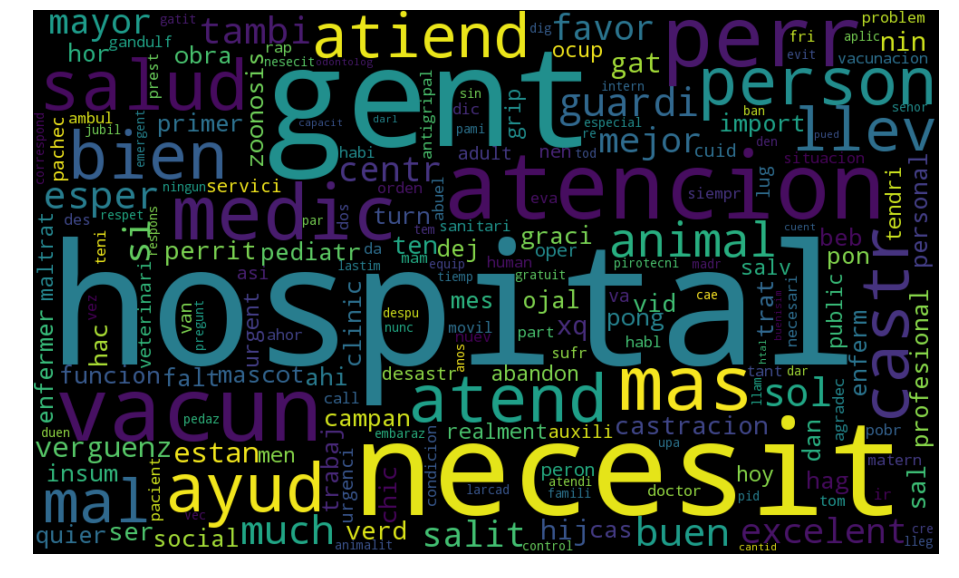

5


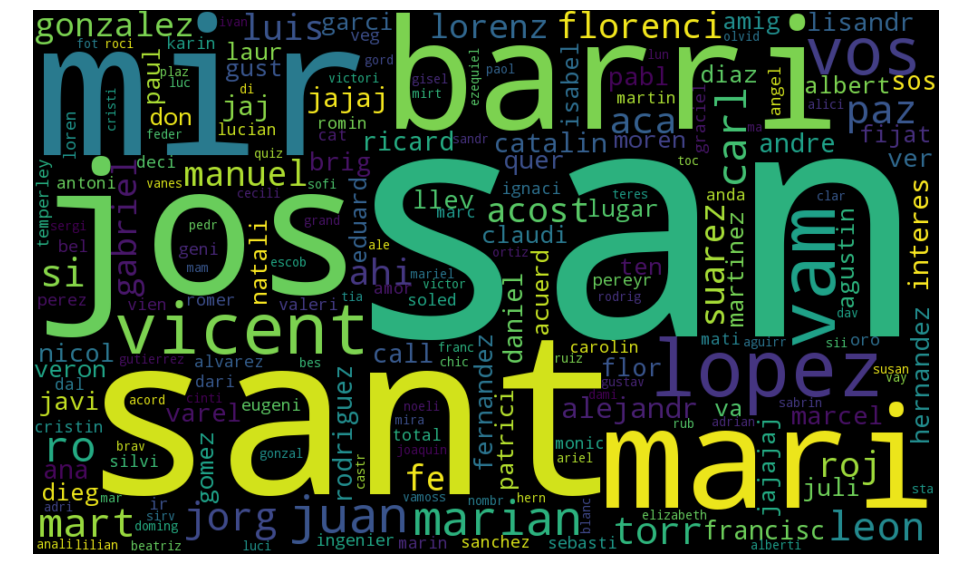

6


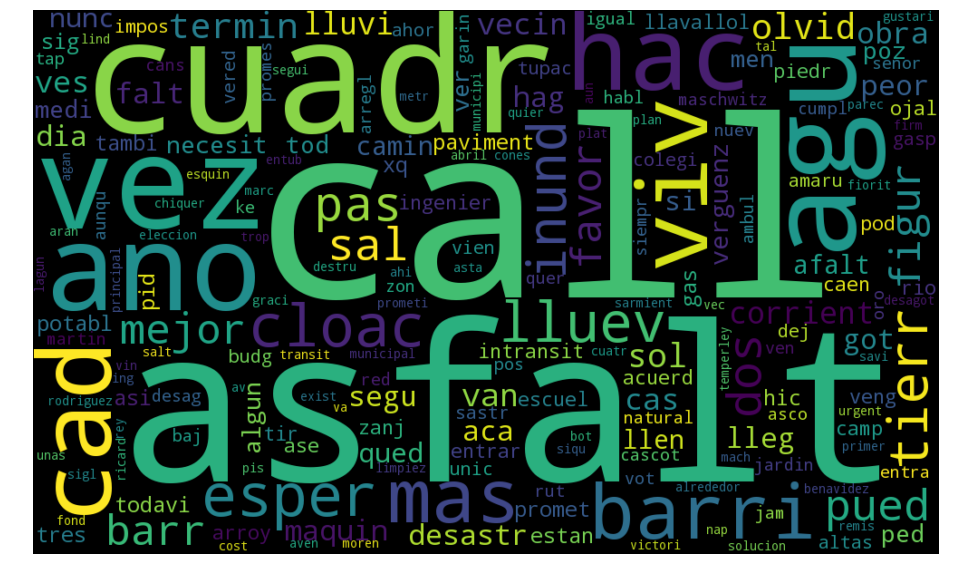

7


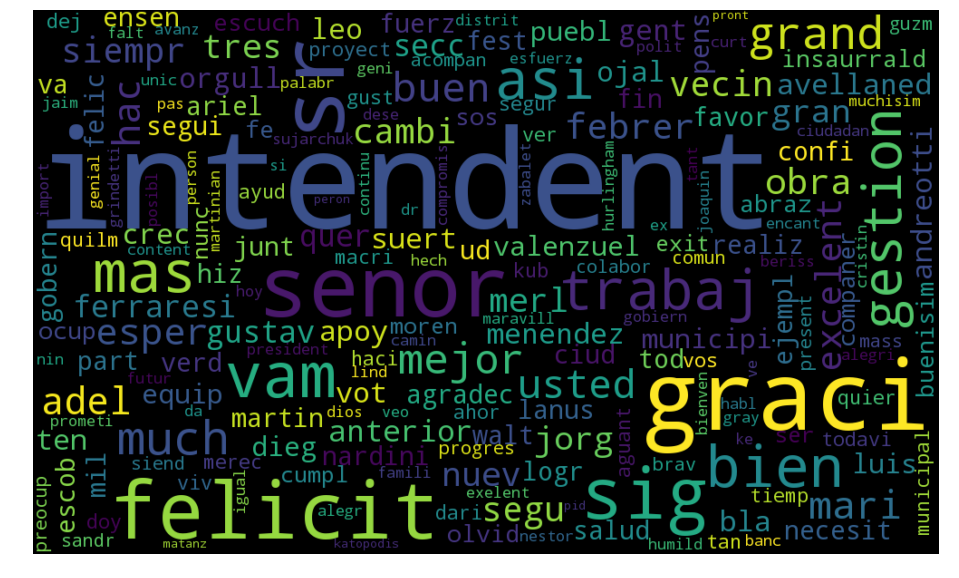

8


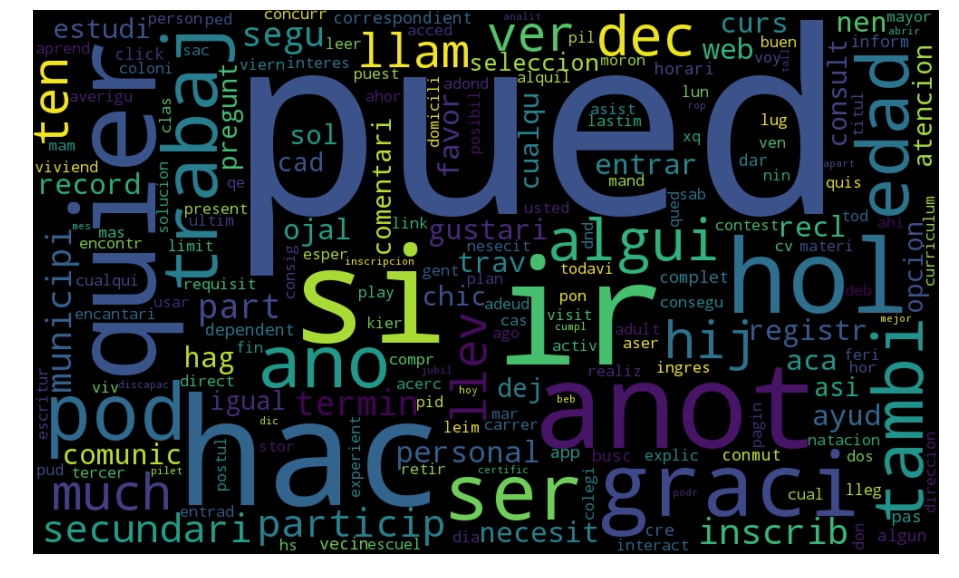

9


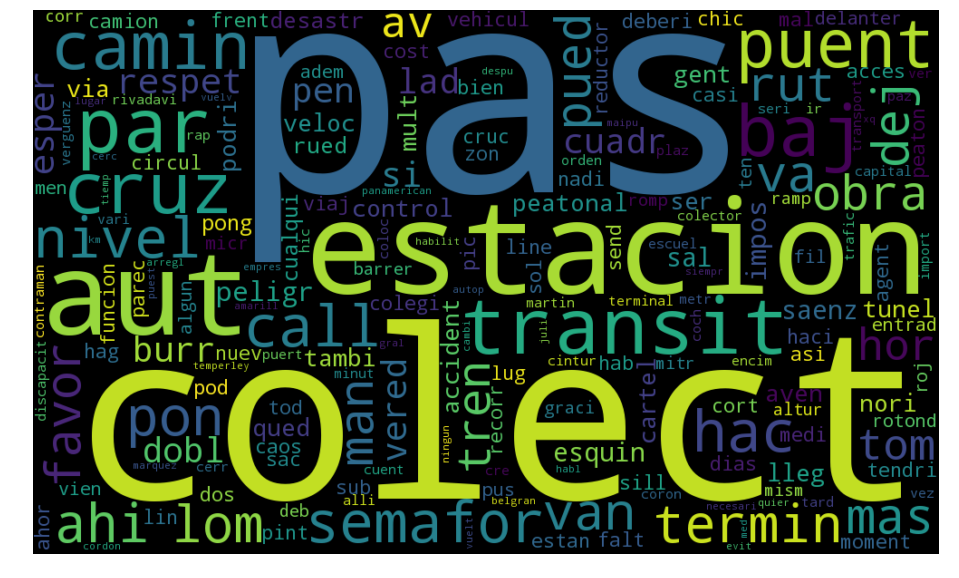

10


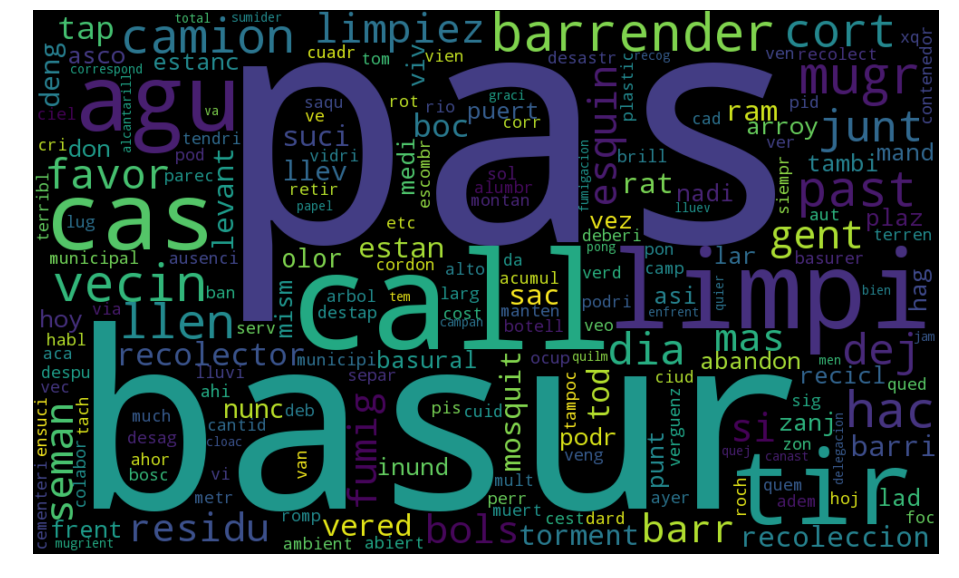

11


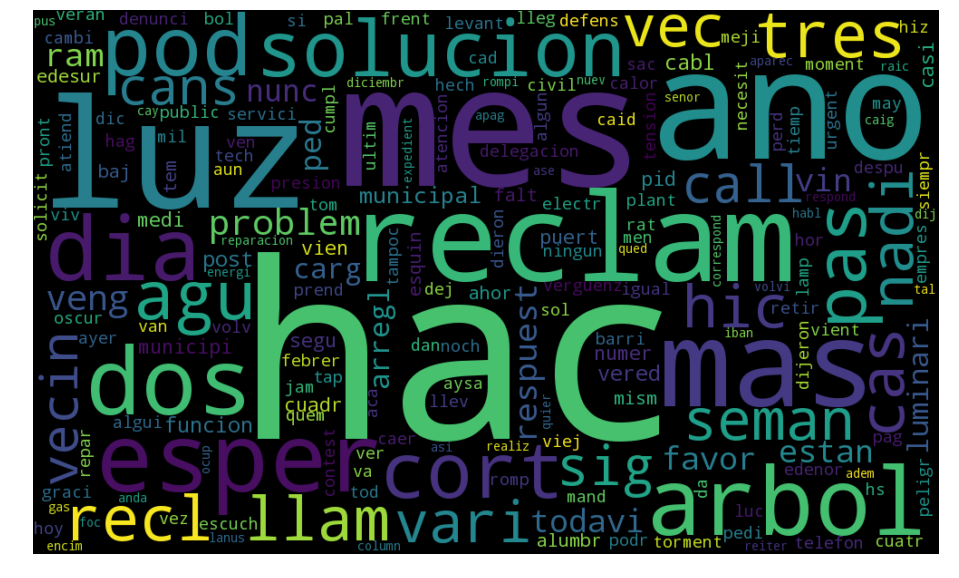

12


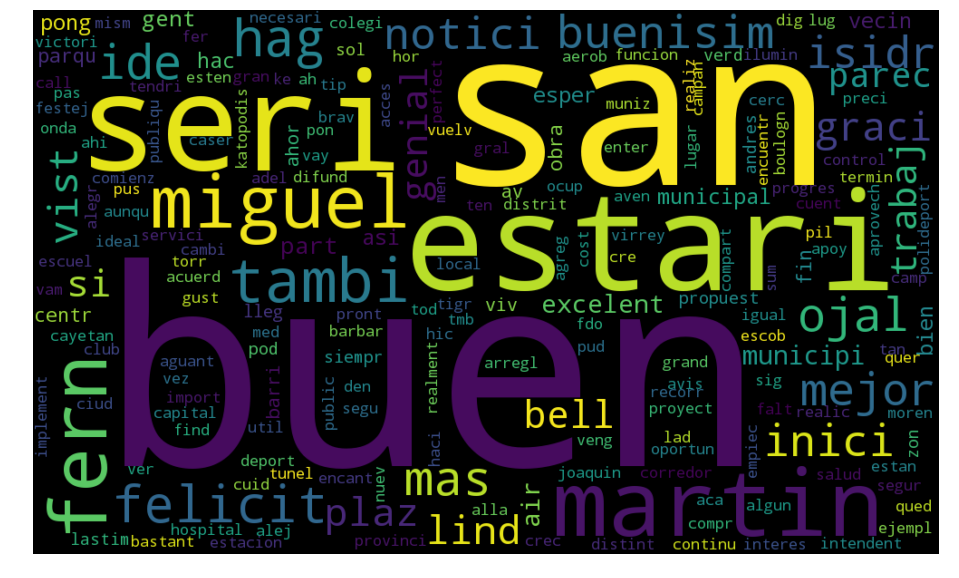

13


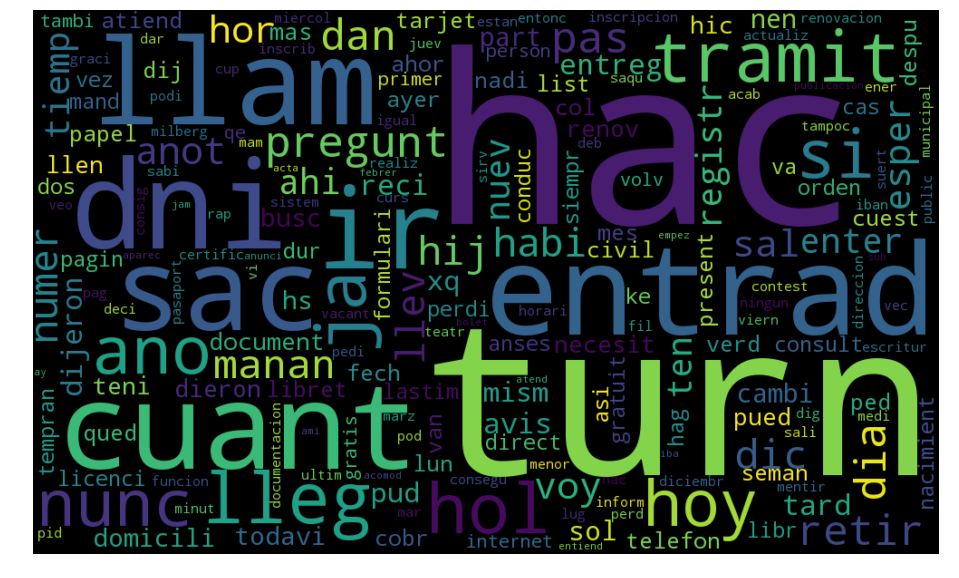

14


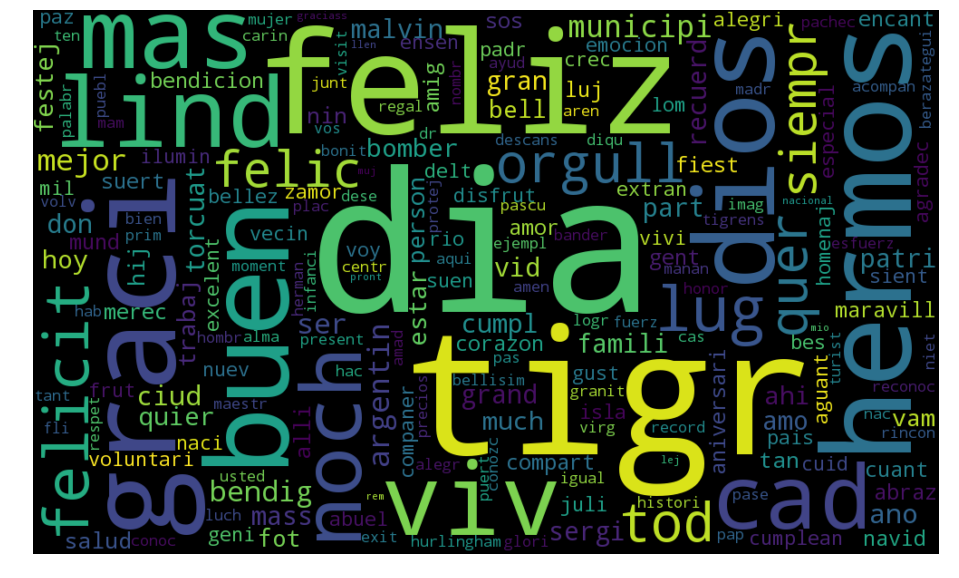

15


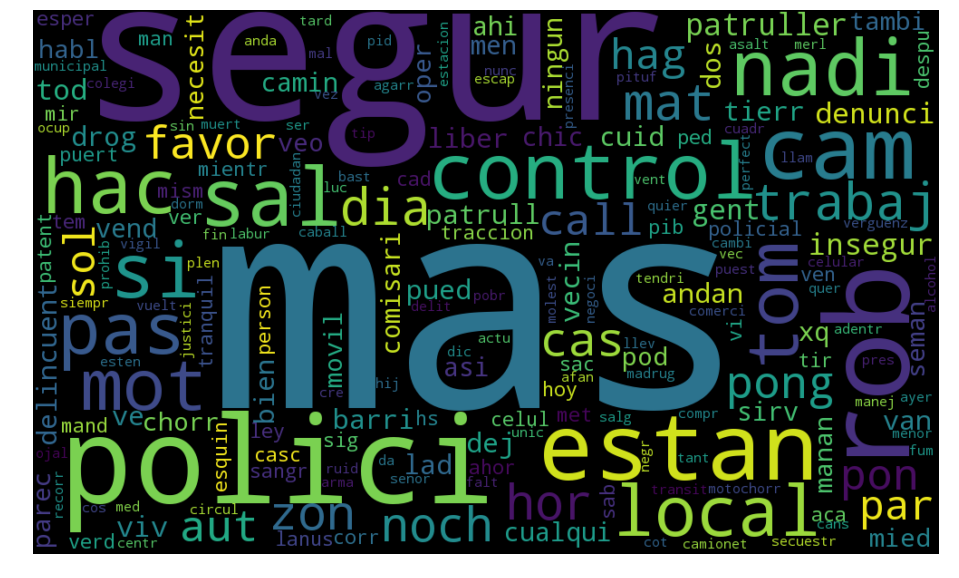

16


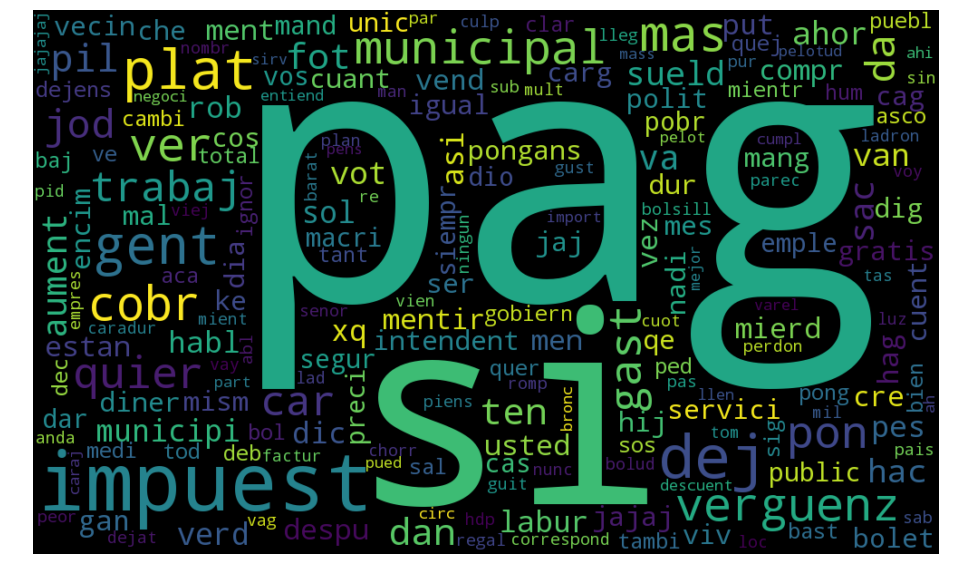

17


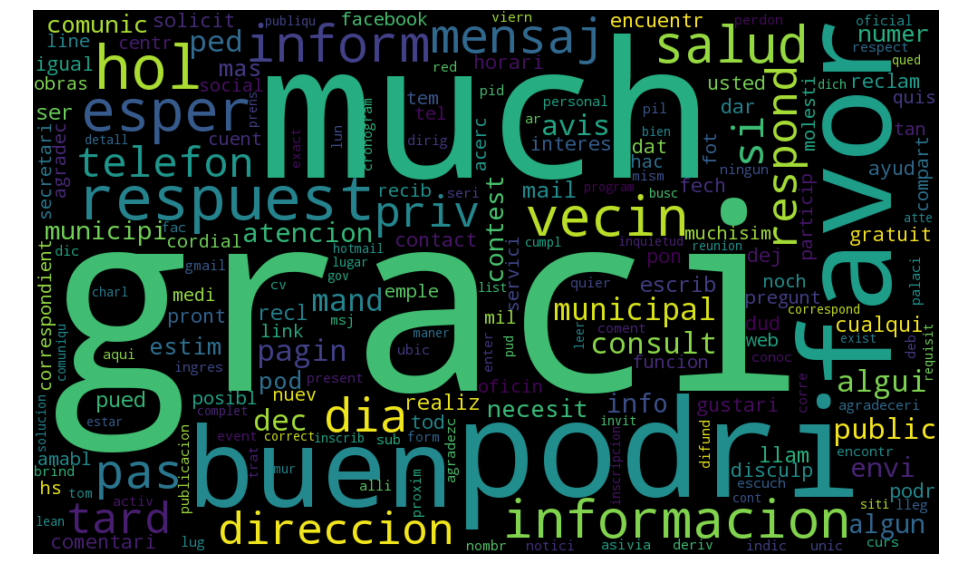

18


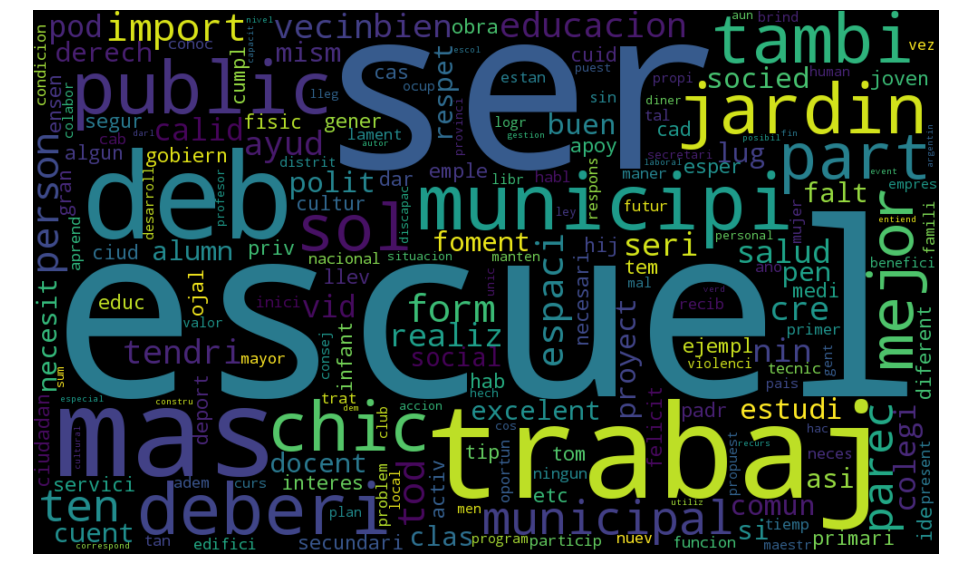

19


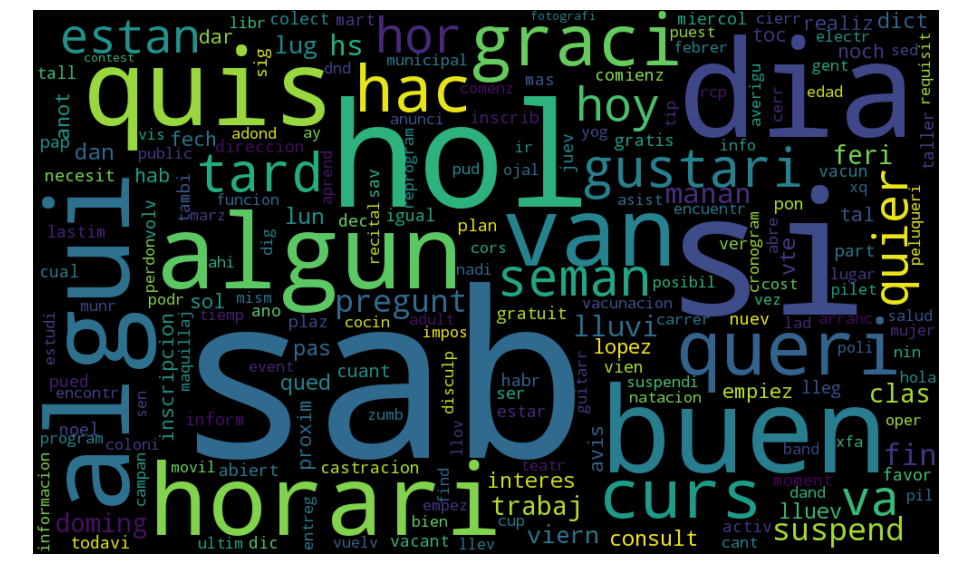

In [38]:
tf_feature_names = cvectorizer.get_feature_names()

for topic_id, topic in enumerate(lda_model.components_):
    print topic_id
    words = [int(round(float(topic[i]) * 100000)) * (tf_feature_names[i]+' ') for i in topic.argsort()[:-400 - 1:-1]]
    text =  re.sub(' +',' ',''.join(words))
    wordcloud = WordCloud(collocations=False, width=1000, height=600).generate(text)
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()